In [1]:
TRAIN_DIR = \
     "./cats_and_dogs_small/train"

In [2]:
TEST_DIR = \
     "./cats_and_dogs_small/test"

In [3]:
IM_WIDTH = 220

In [4]:
IM_HEIGHT = 220

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
                        rotation_range = 360,
                        width_shift_range = 0.5,
                        height_shift_range = 0.5,
                        horizontal_flip=True,
                        vertical_flip = True
                    )

In [7]:
train_generator = train_datagen.flow_from_directory(
                        TRAIN_DIR,
                        target_size=(IM_HEIGHT, IM_WIDTH),
                        batch_size=1,
                        class_mode="binary",
                        shuffle=False
                    )

Found 1653 images belonging to 2 classes.


In [8]:
img,label = train_generator.next()

In [9]:
img.shape

(1, 220, 220, 3)

In [10]:
img[0]

array([[[1.9400000e+02, 1.5400000e+02, 8.3806061e+01],
        [1.9400000e+02, 1.5400000e+02, 8.4000000e+01],
        [1.9400000e+02, 1.5400000e+02, 8.4000000e+01],
        ...,
        [2.5430524e+02, 2.3230524e+02, 1.4930524e+02],
        [2.5268622e+02, 2.3068622e+02, 1.4768622e+02],
        [2.5311113e+02, 2.2826208e+02, 1.4773817e+02]],

       [[1.9423639e+02, 1.5400000e+02, 8.1940903e+01],
        [1.9400000e+02, 1.5400000e+02, 8.2427010e+01],
        [1.9400000e+02, 1.5400000e+02, 8.2972206e+01],
        ...,
        [2.5403264e+02, 2.3203264e+02, 1.4903264e+02],
        [2.5214102e+02, 2.3014102e+02, 1.4714102e+02],
        [2.5467485e+02, 2.2910838e+02, 1.4967485e+02]],

       [[1.9800000e+02, 1.5400000e+02, 8.1000000e+01],
        [1.9699449e+02, 1.5400000e+02, 8.1251373e+01],
        [1.9590410e+02, 1.5400000e+02, 8.1523979e+01],
        ...,
        [2.5352007e+02, 2.3152007e+02, 1.4852007e+02],
        [2.5260628e+02, 2.2979791e+02, 1.4760628e+02],
        [2.5483578e+02

In [11]:
import matplotlib.pyplot as plt

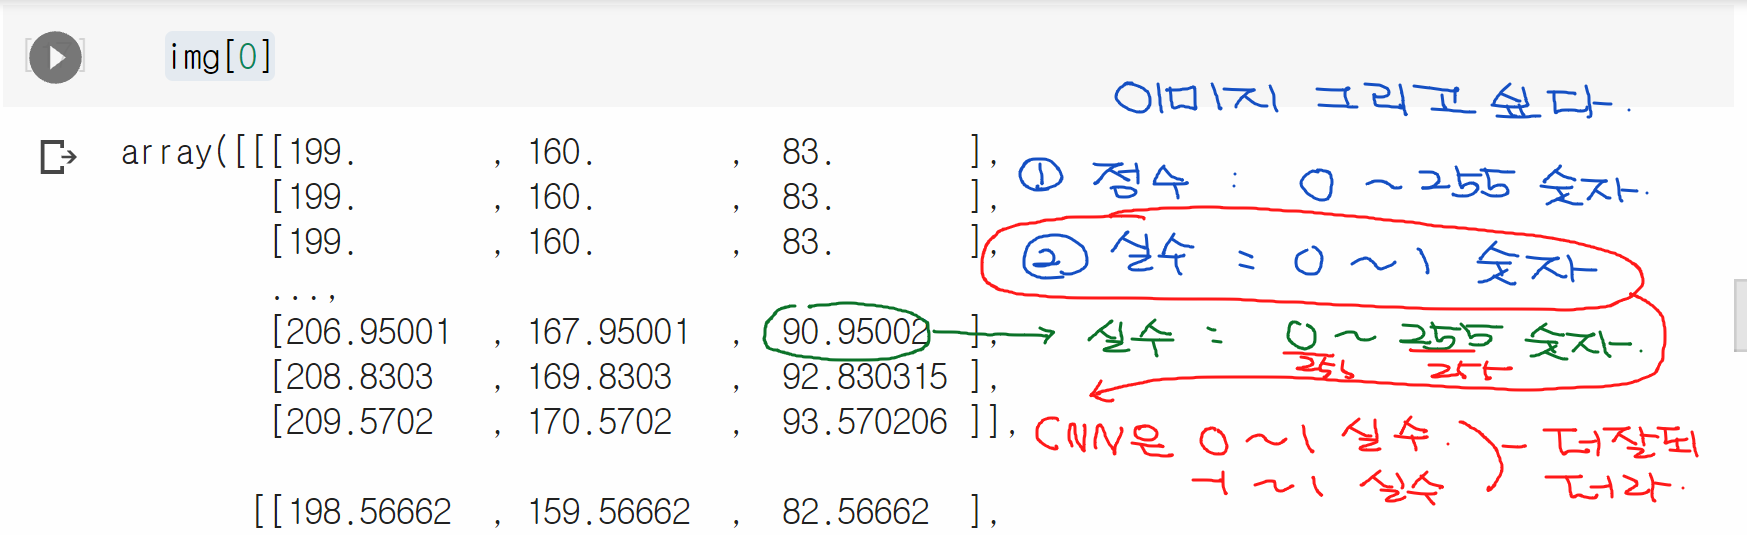

In [12]:
img[0]/255

array([[[7.6078433e-01, 6.0392159e-01, 3.2865122e-01],
        [7.6078433e-01, 6.0392159e-01, 3.2941177e-01],
        [7.6078433e-01, 6.0392159e-01, 3.2941177e-01],
        ...,
        [9.9727541e-01, 9.1100091e-01, 5.8551073e-01],
        [9.9092633e-01, 9.0465182e-01, 5.7916164e-01],
        [9.9259269e-01, 8.9514542e-01, 5.7936537e-01]],

       [[7.6171136e-01, 6.0392159e-01, 3.2133687e-01],
        [7.6078433e-01, 6.0392159e-01, 3.2324317e-01],
        [7.6078433e-01, 6.0392159e-01, 3.2538119e-01],
        ...,
        [9.9620640e-01, 9.0993190e-01, 5.8444172e-01],
        [9.8878831e-01, 9.0251380e-01, 5.7702363e-01],
        [9.9872488e-01, 8.9846426e-01, 5.8696020e-01]],

       [[7.7647060e-01, 6.0392159e-01, 3.1764707e-01],
        [7.7252740e-01, 6.0392159e-01, 3.1863284e-01],
        [7.6825136e-01, 6.0392159e-01, 3.1970188e-01],
        ...,
        [9.9419636e-01, 9.0792185e-01, 5.8243161e-01],
        [9.9061286e-01, 9.0116829e-01, 5.7884812e-01],
        [9.9935603e-01

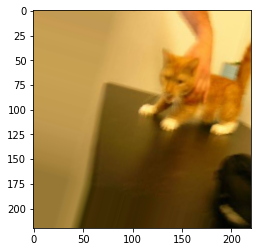

In [13]:
plt.imshow(img[0]/255)

In [14]:
train_datagen = ImageDataGenerator(
                        rescale = 1/255,
                        rotation_range = 360,
                        width_shift_range = 0.5,
                        height_shift_range = 0.5,
                        horizontal_flip=True,
                        vertical_flip = True
                    )

In [15]:
train_generator = train_datagen.flow_from_directory(
                        TRAIN_DIR,
                        target_size=(IM_HEIGHT, IM_WIDTH),
                        batch_size=16,
                        class_mode="binary",
                        shuffle=True
                    )

Found 1653 images belonging to 2 classes.


In [16]:
img, label = train_generator.next()

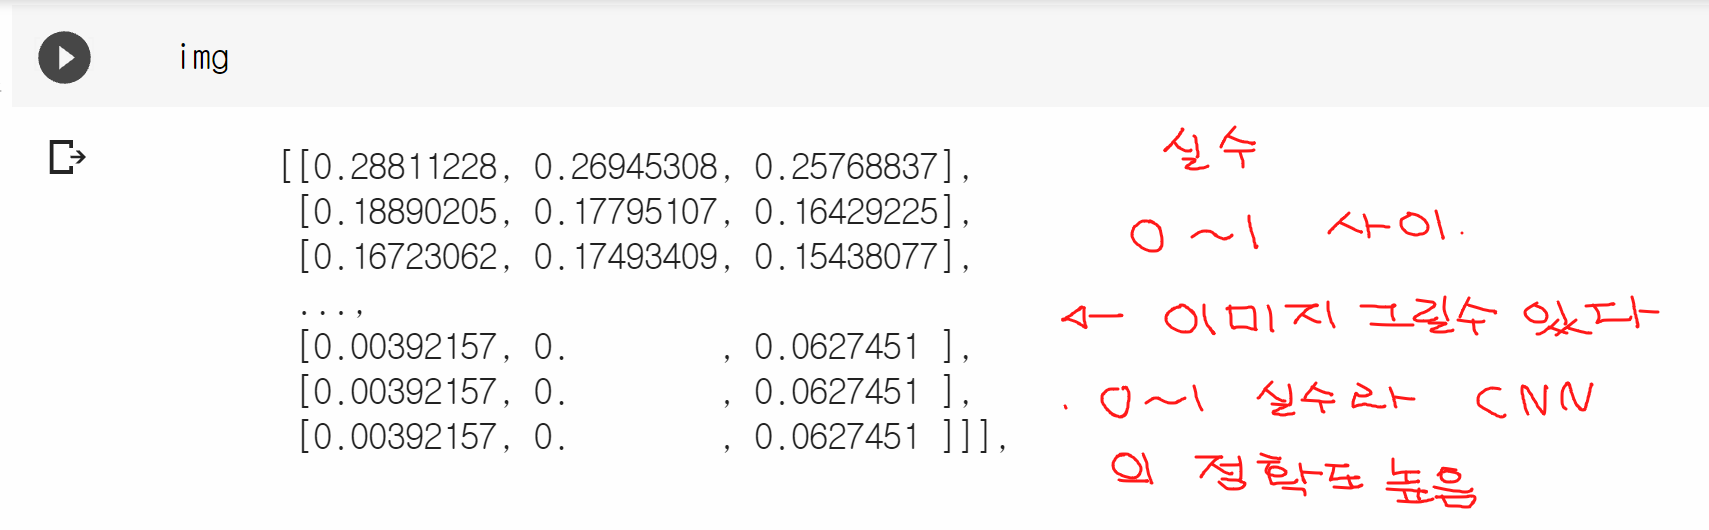

In [17]:
label # cat : 0, dog : 1

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
      dtype=float32)

In [18]:
test_datagen = ImageDataGenerator(
                    rescale = 1/255
                )

In [19]:
test_generator = test_datagen.flow_from_directory(
                            TEST_DIR,
                            target_size=(IM_HEIGHT, IM_WIDTH),
                            batch_size=10,
                            class_mode="binary",
                            shuffle=True
                        )

Found 1000 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()

In [22]:
from tensorflow.keras.layers import Conv2D

In [23]:
model.add(
            Conv2D(32, kernel_size=(3,3), input_shape=(220, 220, 3)
            , activation="relu", padding="SAME")           
          )

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.layers import MaxPooling2D

In [26]:
model.add(MaxPooling2D( pool_size=2, padding="SAME", strides=2) )

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="SAME"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(MaxPooling2D(pool_size=2, padding="SAME", strides=2))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(Conv2D(128, kernel_size=(3,3), padding="SAME", activation="relu"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.add(MaxPooling2D(pool_size=2, padding="SAME", strides=2))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
____________________________________________________

In [36]:
from tensorflow.keras.layers import Flatten

In [37]:
model.add(Flatten())

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [39]:
from tensorflow.keras.layers import Dense

In [40]:
model.add(Dense(512, activation="relu"))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [42]:
model.add(Dense(1, activation="sigmoid"))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [44]:
from tensorflow.keras.optimizers import Adam

In [45]:
model.compile(
                  loss="binary_crossentropy", 
                   optimizer=Adam(learning_rate=1e-5),
                   metrics=["acc"]
              )

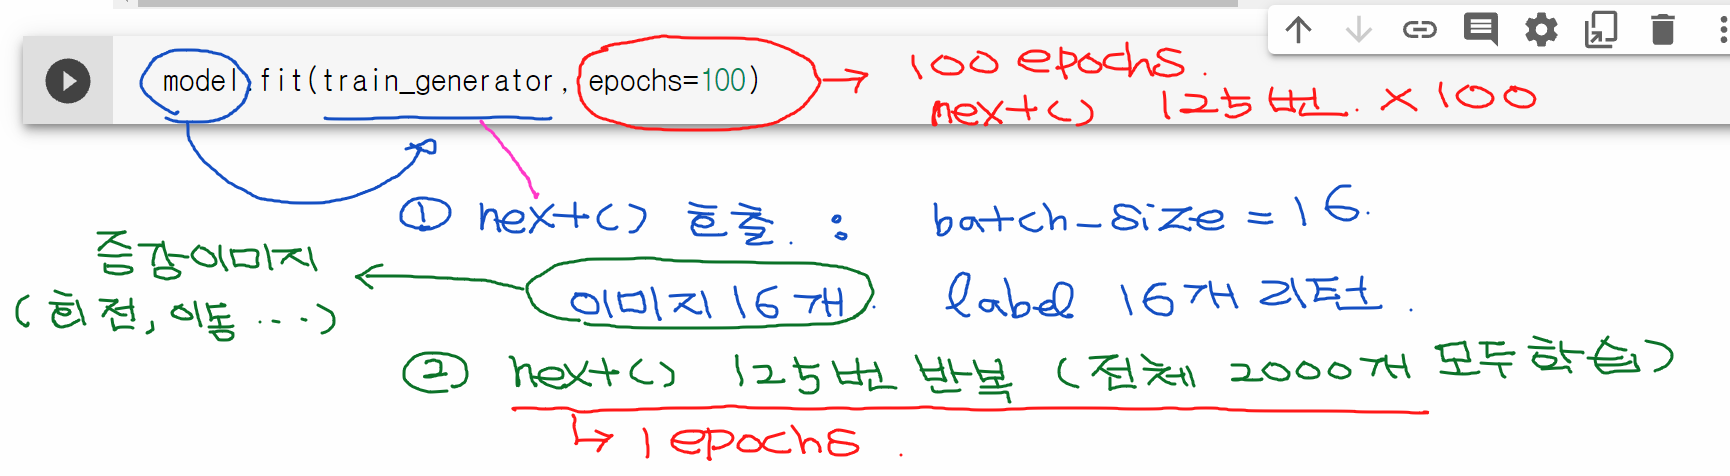

In [46]:
model.fit(train_generator, epochs=10)

Epoch 1/10
104/104 [==============================] - 77s 733ms/step - loss: 0.6831 - acc: 0.5789
Epoch 2/10
104/104 [==============================] - 83s 792ms/step - loss: 0.6734 - acc: 0.6050
Epoch 3/10
104/104 [==============================] - 82s 788ms/step - loss: 0.6681 - acc: 0.6140
Epoch 4/10
104/104 [==============================] - 83s 798ms/step - loss: 0.6687 - acc: 0.6165
Epoch 5/10
104/104 [==============================] - 84s 810ms/step - loss: 0.6608 - acc: 0.6316
Epoch 6/10
104/104 [==============================] - 85s 815ms/step - loss: 0.6541 - acc: 0.6419
Epoch 7/10
104/104 [==============================] - 86s 822ms/step - loss: 0.6528 - acc: 0.6425
Epoch 8/10
104/104 [==============================] - 90s 860ms/step - loss: 0.6504 - acc: 0.6467
Epoch 9/10
104/104 [==============================] - 88s 843ms/step - loss: 0.6442 - acc: 0.6461
Epoch 10/10
104/104 [==============================] - 86s 825ms/step - loss: 0.6472 - acc: 0.6443
